In [ ]:
# LASER
!python -m laserembeddings download-models

# SENTENCE-BERT
!pip install transformers # https://github.com/huggingface/transformers
!pip install -U sentence-transformers # https://github.com/UKPLab/sentence-transformers

# UNIVERSAL SENTENCE ENCODER
!pip install tensorflow
!pip install tensorflow_hub

# FASTTEXT
!pip install fasttext

In [1]:
import seaborn as sns
import numpy as np

from models import FastText, LaserModel, SentenceBert, Tfidf, Use
from utils import get_similarity, plot_similarity, print_sentences
from arrays import same, different, same_diff, same_diff_cat, synonyms, synonym_cat, homonyms, homonym_cat, search_sentences, search_cat, sentences, sentence_cat

## 1. Choose which model to use

Available models:
* FastText
* LaserModel
* SentenceBert
* Tfidf
* Use

In [2]:
# Choose the model to use:
model = Tfidf()

## 2. Create vectors

In [3]:
same_vec = model.get_sentence_vec(same)
different_vec = model.get_sentence_vec(different)
same_diff_vec = model.get_sentence_vec(same_diff)
synonym_vec = model.get_sentence_vec(synonyms)
homonym_vec = model.get_sentence_vec(homonyms)
search_vec = model.get_sentence_vec(search_sentences)
sentence_vec = model.get_sentence_vec(sentences)

## 3. Semantic Search

In [4]:
scores = []

# Choose your search term
search_term = search_vec[4]

for sentence in sentence_vec:
    score = round(get_similarity(sentence, search_term),2)
    scores.append(score)

In [5]:
results = []

for (score,sentence,category) in zip(scores, sentences, sentence_cat):
    results.append([score, sentence, category])

results.sort(reverse=True)

for row in results:
    print(row[0], row[2])

0.06 FINANCE_1
0.02 POLITICS_1
0.02 FOOD_2
0.02 POLITICS_2
0.02 SCIENCE_2
0.01 SPORTS_1
0.01 SCIENCE_1
0.01 SPORTS_2
0.0 FINANCE_2
0.0 FOOD_1


**Search sentences:**

* **Sports:** "Tarasenko has been one of the NHL's leading scorers during his nine-year career, with 214 goals in 507 games."
* **Politics:** "A political system is a framework which defines acceptable political methods within a society."
* **Food:** "This meal has summer dinner written all over it."
* **Science:** "Science is based on research, which is commonly conducted in academic and research institutions as well as in government agencies and companies"
* **Finance:** "Stocks mixed after Powell's inflation plan"

**Sentences:**

* **Sports 1:** "The Vikings defense is already one of the best in the NFL and won’t ask much of Gladney."
* **Sports 2:** "And just like we saw in both games against FC Dallas, Nashville was sharp in the defensive third and in midfield."
* **Politics 1:** "This is election is a choice between President Trump’s strong stance with law and order and Joe Biden’s acquiescence to the anti-police left and siding with rioters."
* **Politics 2:** "Democrats are willing to resume negotiations once Republicans start to take this process seriously."
* **Food 1:** "Made with fresh peaches, sugar, and a topping that bakes like slightly underbaked cookie dough, with crunchy sugar broiled on top."
* **Food 2:** "Is there anything better than a fresh batch of soft chocolate chip cookies? "
* **Science 1:** "Scientists from 17 UK research centres are attempting to answer questions such as how long immunity lasts and why disease severity varies so much."
* **Science 2:** "Decoding goals and movement plans is hard when you don't understand the neural code in which those things are communicated."
* **Finance 1:** "Dow futures up 200 points in overnight trading after the index briefly erases 2020 losses"
* **Finance 2:** "Wednesday’s gains put the S&P 500 up more than 58% since hitting an intraday low on March 23."


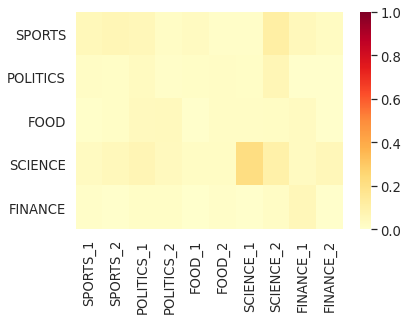

In [6]:
plot_similarity(search_cat, sentence_cat, search_vec, sentence_vec)

## 4. Synonyms and Homonyms

**Synonyms/Paraphrases (Different spelling, same meaning)**

* **S1_a:** "The need for software developers has gone up by 50% in 5 years"
* **S1_b:** "The demand for programmers has doubled during the last five years"
* **S2_a:** "Personal computers entered the market in 1977"
* **S2_b:** "PCs came into shops in the late seventies"
* **S3_a:** "Symptoms of influenza include fever and nasal congestion."
* **S3_b:** "A stuffy nose and elevated temperature are signs you may have the flu."
* **S4_a:** "He has tons of stuff to throw away."
* **S4_b:** "He needs to get rid of a lot of junk."
* **S5_a:** "Her life spanned years of incredible change for women as they gained more rights than ever before."
* **S5_b:** "She lived through the exciting era of women's liberation."

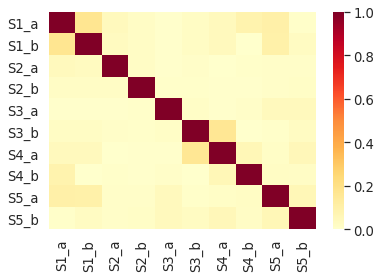

In [7]:
plot_similarity(synonym_cat, synonym_cat, synonym_vec, synonym_vec)

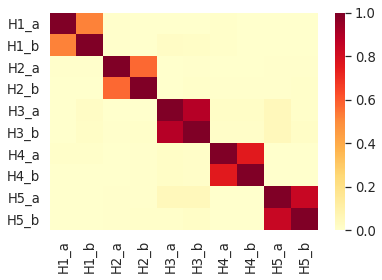

In [8]:
plot_similarity(homonym_cat, homonym_cat, homonym_vec, homonym_vec)

## 5. Same and different sentences with connecting words

The 4 first sentences have the same meaning, but different structure. The 4 last sentences have different meaning, but share words with the first 4 sentences.

**Same meaning:**

1. "She angered me with her inappropriate comments, rumor-spreading, and disrespectfulness at the **formal** dinner **table**."
2. "She made me **angry** when she was rude at dinner."
3. "Her impoliteness, gossiping, and **general** lack of respect at dinner infuriated me."
4. "I was **mad** when she started **spreading** rumors, making inappropriate comments, and disrespecting other guests at our dinner."

**Different meaning:**

5. "The company requires a **formal** dress code during work hours"
6. "President Donald Trump called Joe Biden's running mate Kamala Harris **'angry'** and **'mad'**"
7. "The influenza is **spreading** from **table** surfaces in the restaurants." 
8. "The Coffee Test is one of the tests for human-level Artificial **General** Intelligence."

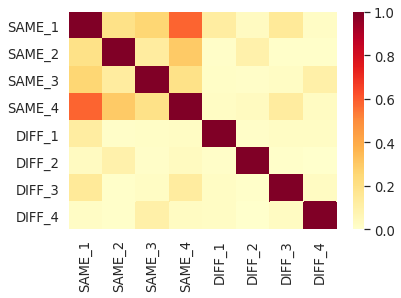

In [9]:
plot_similarity(same_diff_cat, same_diff_cat, same_diff_vec, same_diff_vec)